In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Use the cross validation techniques discussed in the lesson to figure out what kind of model works best with the cars dataset used in the lesson.

In [7]:
df = data('mpg')

In [8]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
df.trans = np.where(df.trans.str.startswith('auto'), 'auto', 'manual')

In [10]:
X = df[['displ', 'year', 'cyl', 'cty', 'hwy']]
y = df.trans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=.25,
                                                  random_state=123)

In [11]:
X_train.shape, X_val.shape, X_test.shape

((140, 5), (47, 5), (47, 5))

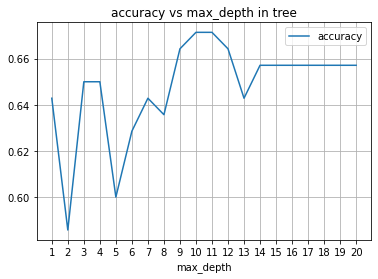

In [20]:
results = []
for x in range(1,21):
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    score = cross_val_score(tree, X_train, y_train, cv=5).mean()
    results.append([x, score])
pd.DataFrame(results, columns = ['max_depth', 'accuracy']).set_index('max_depth').plot(xticks=range(1,21))
plt.title('accuracy vs max_depth in tree')
plt.grid()
plt.show()

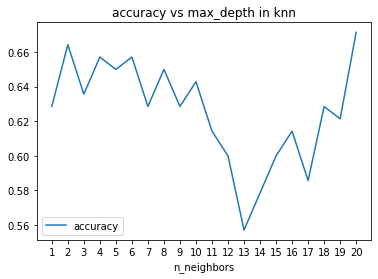

In [15]:
results = []
for x in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=x)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    results.append([x, score])
pd.DataFrame(results, columns = ['n_neighbors', 'accuracy']).set_index('n_neighbors').plot(xticks=range(1,21))
plt.title('accuracy vs max_depth in knn')
plt.show()

In [18]:
dt = DecisionTreeClassifier(random_state=123)
params = {'max_depth':range(1,21),
         'min_samples_leaf':range(1,21),
         'criterion':['gini', 'entropy']}
grid = GridSearchCV(dt, params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_.score(X_test, y_test), grid.best_estimator_

(0.723404255319149,
 DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=123))

In [19]:
knn = KNeighborsClassifier()
params = {'n_neighbors':range(1,21)}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_.score(X_test, y_test), grid.best_estimator_

(0.7021276595744681, KNeighborsClassifier(n_neighbors=20))

In [21]:
# The best model was a Decision tree with max_depth 9 when using the GridSearch.
# The best model was also a tree but with max_depth 10 or 11 when using cross_val_score